## Creating new layers (extra)

Since geopandas takes advantage of Shapely geometric objects, it is possible to create spatial data from scratch by passing Shapely's geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into spatial data layers. Next we will see how to create a new GeoDataFrame from scratch and save it into a Shapefile. Our goal is to define a geometry that represents the outlines of the [Senate square in Helsinki, Finland](https://fi.wikipedia.org/wiki/Senaatintori).

Start by importing necessary modules:

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

Let's create an empty `GeoDataFrame`:

In [2]:
newdata = gpd.GeoDataFrame()

In [3]:
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


We have an empty GeoDataFrame! A geodataframe is basically a pandas DataFrame that should have one column dedicated for geometries. By default, the geometry-column should be named `geometry` (geopandas looks for geometries from this column).  

Let's create the `geometry` column:

In [4]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

In [5]:
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Now we have a `geometry` column in our GeoDataFrame but we still don't have any data.

Let's create a Shapely `Polygon` repsenting the Helsinki Senate square that we can later insert to our GeoDataFrame:

In [6]:
# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [7]:
# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

In [8]:
# Check the polyogon
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Okay, now we have an appropriate `Polygon` -object.

Let's insert the polygon into our 'geometry' column of our GeoDataFrame on the first row:

In [9]:
# Insert the polygon into 'geometry' -column at row 0
newdata.at[0, 'geometry'] = poly

In [10]:
# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


Great, now we have a GeoDataFrame with a Polygon that we could already now export to a Shapefile. However, typically you might want to include some attribute information with the geometry. 

Let's add another column to our GeoDataFrame called `location` with text `Senaatintori` that describes the location of the feature.

In [11]:
# Add a new column and insert data 
newdata.at[0, 'location'] = 'Senaatintori'

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


Okay, now we have additional information that is useful for recognicing what the feature represents. 

Before exporting the data it is always good (basically necessary) to **determine the coordinate reference system (projection) for the GeoDataFrame.** GeoDataFrame has an attribute called `.crs` that shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch (more about projection on next tutorial):

In [12]:
print(newdata.crs)

None


Let's add a crs for our GeoDataFrame. We passed the coordinates as latitude and longitude decimal degrees, so the correct CRS is WGS84 (epsg code: 4326).

Add CRS definition to `newdata` in wkt format using pyproj CRS:

In [13]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = CRS.from_epsg(4326).to_wkt()

As we can see, now we have added coordinate reference system information into our `GeoDataFrame`. The CRS information is necessary for creating a `.prj` file for our output Shapefile. 

-  Finally, we can export the GeoDataFrame using `.to_file()` -function. The function works quite similarly as the export functions in pandas, but here we only need to provide the output path for the Shapefile. Easy isn't it!:

In [14]:
# Determine the output path for the Shapefile
outfp = "L2_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Now we have successfully created a Shapefile from scratch using only Python programming. Similar approach can be used to for example to read
coordinates from a text file (e.g. points) and create Shapefiles from those automatically.


#### Check your understanding


<div class="alert alert-info">

    
Check the output Shapefile by reading it with geopandas and make sure that the attribute table and geometry seems correct.

</div>

<div class="alert alert-info">
    
Re-project the data to ETRS-TM35FIN (EPSG:3067) and save into a new file!

</div>


In [15]:
newdata

,geometry,location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


<AxesSubplot:>

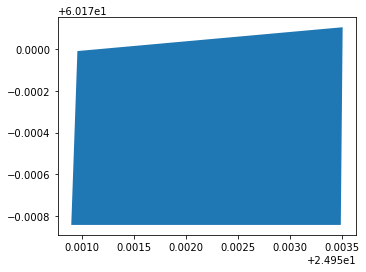

In [16]:
newdata.plot()